<a href="https://colab.research.google.com/github/rafaborneo/eticaDiplo2021/blob/main/Etica_Practico2_borneo_rafael.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones** **DIPLODATOS 2021**

---

## **Práctico 2: "MITIGANDO SESGOS en Aprendizaje Automático".**

**ALUMNO: Borneo Benista, Rafael**


# **Parte 0: Instalación de librerias necesarias ara el práctico**

In [1]:
!pip install --user responsibly

     |████████████████████████████████| 28.2 MB 59.4 MB/s 
     |████████████████████████████████| 12.8 MB 66.9 MB/s 
     |████████████████████████████████| 24.2 MB 1.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 2.2.5 which is incompatible.
mizani 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 2.2.5 which is incompatible.
arviz 0.11.4 requires matplotlib>=3.0, but you have matplotlib 2.2.5 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
import responsibly

responsibly.__version__

'0.1.3'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import logging

from numpy.linalg import norm
from gensim.models import KeyedVectors
from sklearn.metrics import classification_report, accuracy_score

logging.basicConfig(format='%(asctime)s : %(message)s', level=logging.INFO)

!wget -q http://dcc.uchile.cl/~jperez/word-embeddings/fasttext-sbwc.100k.vec.gz

!gzip -d -q fasttext-sbwc.100k.vec.gz
!ls

fasttext-sbwc.100k.vec	sample_data


In [4]:
we_es = KeyedVectors.load_word2vec_format('fasttext-sbwc.100k.vec')

we_es.init_sims(replace=True)

2021-12-05 10:58:36,860 : loading projection weights from fasttext-sbwc.100k.vec
2021-12-05 10:59:07,504 : loaded (100000, 300) matrix from fasttext-sbwc.100k.vec
2021-12-05 10:59:07,506 : precomputing L2-norms of word weight vectors


In [5]:
from numpy.testing import assert_almost_equal

length_vectors = norm(we_es.vectors_norm, axis=1)

assert_almost_equal(actual=length_vectors,
                    desired=1,
                    decimal=5)

# 1. **ALGUNAS PALABRAS CON SESGO EN EL EJE JUVENTUD_VEJEZ (JOVEN_VIEJO): EJE BINARIO PARA SIMPLIFICAR**

In [7]:
# vejez es a adicción lo que joven es a.....
we_es.most_similar(positive=['adicción', 'juventud'],negative=['vejez'])

[('adicciones', 0.5689460039138794),
 ('drogadicción', 0.5495569705963135),
 ('adicto', 0.5482889413833618),
 ('drogas', 0.5420212745666504),
 ('alcoholismo', 0.5117813348770142),
 ('adictiva', 0.5112063884735107),
 ('adictivas', 0.5108566880226135),
 ('adictos', 0.5075235366821289),
 ('farmacodependencia', 0.5029911994934082),
 ('adicta', 0.5021463632583618)]

In [6]:
# juventud es a adicción lo que viejo es a.....
we_es.most_similar(positive=['adicción', 'vejez'],negative=['juventud'])

[('enfermedad', 0.6032508611679077),
 ('demencia', 0.5731257200241089),
 ('degenerativa', 0.5455186367034912),
 ('esquizofrenia', 0.5345392227172852),
 ('alcoholismo', 0.5247284173965454),
 ('psicóticos', 0.5245453715324402),
 ('alzheimer', 0.5220963358879089),
 ('invalidez', 0.5216646194458008),
 ('depresivos', 0.5183150172233582),
 ('degenerativas', 0.5173851847648621)]

In [ ]:
OBSERVACION vejez esta asociada a enfermedad, demencia , mintras que juventud a la adiccion.

**DIRECCION EN EJE EDAD (JUVENTUD VEJEZ)**

In [8]:
from responsibly.we import BiasWordEmbedding

we_es_age= BiasWordEmbedding(we_es, only_lower=True)

2021-12-05 11:08:53,544 : precomputing L2-norms of word weight vectors


In [9]:
d_juventud = ['juventud']
d_vejez = ['vejez']

we_es_age._identify_direction('juventud', 'vejez',
                                          definitional=(d_juventud, d_vejez),
                                          method='sum')

In [10]:
direction_es = we_es_age.direction

direction_es /= norm(direction_es)

In [12]:
#DOS EJEMPLOS
#enfermedad se direcciona a la vejez, adiccion a la juventud 

direction_es @ we_es.word_vec('enfermedad'),direction_es @ we_es.word_vec('adicción')

(-0.32211286, 0.013389375)

**BIAS EN LAS PROFESIONES**

In [15]:
profesiones = [
    'chofer',
    'columnista',
    'publicista',
    'naturista',
    'asistente',
    'taxista',
    'psiquiatra',
    'policia',
    'dentista',
    'florista',
    'docente',
    'periodista',
    'electricista',
    'economista',
    'atleta',
    'terapeuta',
    'piloto',
    'modelo',
    'estudiante',
    'comerciante',
    'chef',
    'cantante',
    'militar',
    'agricultor',
    'artesano',
    'cajero',
    'plomero',
    'mecánico',
    'obrero',
    'panadero',
    'repartidor',
    'soldador',
    'vendedor',
    'vigilante',
    'secretario',
    'pescador',
    'peluquero',
    'jardinero',
    'enfermera',
    'carpintero',
    'carnicero',
    'bibliotecario',
    'albañil',
    'abogado', 
    'arquitecto',
    'contador',
    'farmacéutico',
    'ingeniero', 
    'médico',
    'político',
    'empresario', 
    'científico',
    'informático'
]

2021-12-05 11:18:09,296 : NumExpr defaulting to 2 threads.


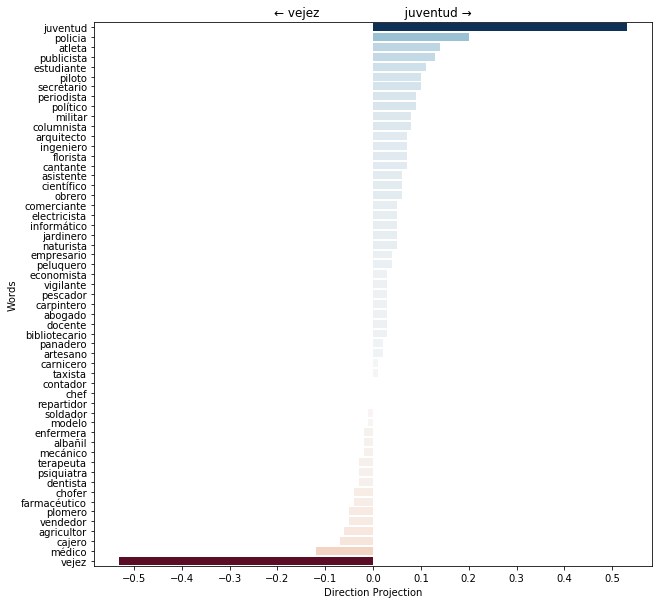

In [18]:
import matplotlib.pylab as plt

f, ax = plt.subplots(1, figsize=(10, 10))

we_es_age.plot_projection_scores(
    profesiones + d_juventud[:1] + d_vejez[:1],
    n_extreme=30,
    ax=ax);

**EL GRAFICO MUESTRA CLARAMENTE EL SESGO EXISTENTE EN LAS PROFESIONES EN EL EJE JUVENTUD VEJEZ----EDAD **

In [19]:
#CALCULOO DEL BIAS
we_es_age.calc_direct_bias(profesiones, c=None)

0.0524188604377175

**APLICACION METODO DE NEUTRALIZACION DEL BIAS**

In [20]:
we_es_age_debias = we_es_age.debias(method = 'neutralize' , neutral_words= profesiones, inplace=False)

2021-12-05 11:22:33,453 : precomputing L2-norms of word weight vectors
2021-12-05 11:22:34,969 : precomputing L2-norms of word weight vectors


In [22]:
we_es_age_debias.calc_direct_bias(profesiones, c=None)
#NUMERO DE BIAS MUY CERCA DE CERO (MUY PEQUEÑO)

8.412354748857742e-09

# **GRAFICO DE PROFESIONES CON SESGO MITIGADO**

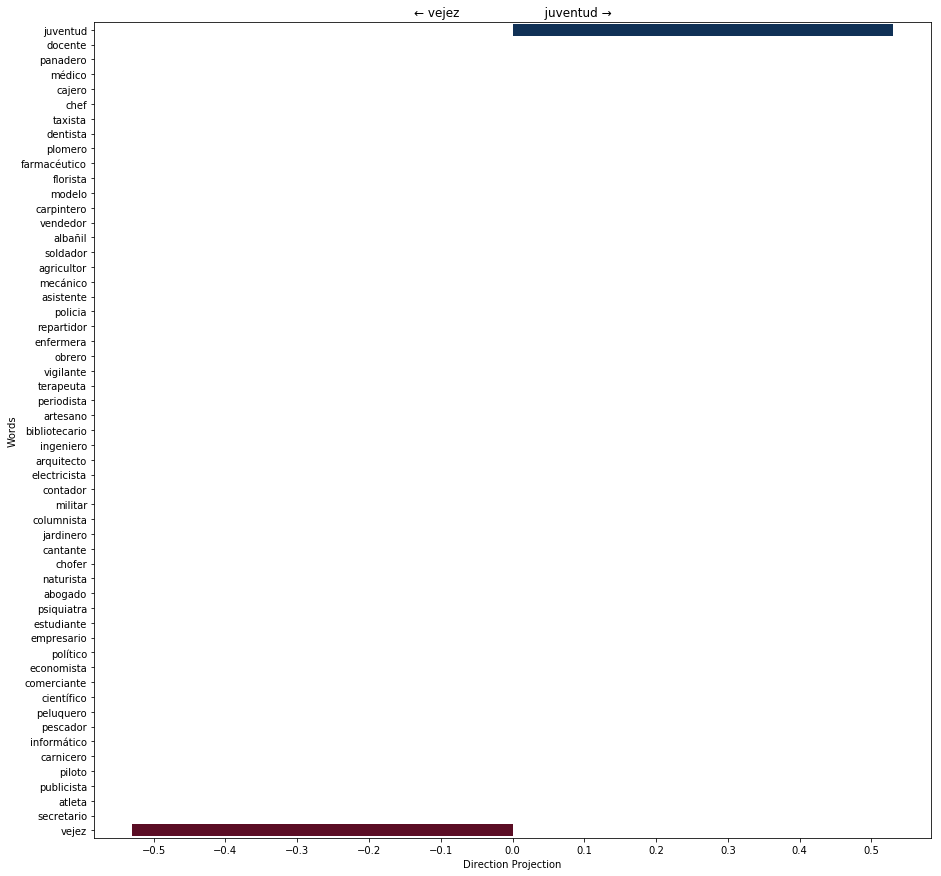

In [25]:
f, ax = plt.subplots(1, figsize=(15, 15))

we_es_age_debias.plot_projection_scores(
    profesiones + d_juventud[:1] + d_vejez[:1] ,
    n_extreme=50,
    ax=ax);

# **CONCLUSION: HAN DESAPARECIDO DEL GRAFICO LAS DIRECCIONES QUE SE OBSERVABAN ANTERIORMENTE LO QUE CONFIRMA EL BAJO VALOR DE BIAS CALCULADO (8.412354748857742e-09)**